# Lecture 8 Delta Hedging

**Introduction to Quantitative Methods in Finance**

**The Erdös Institute**

### Purpose of the Notebook

Dynamic delta hedging has a tendency to generate profit distributions that exhibit a distribution that resembles a normal distribution. This unique property has profound implications for understanding the behavior of profits in response to market fluctuations.

**Delta Hedging**

Delta hedging is a risk management strategy used in financial markets, particularly in options trading, to reduce or eliminate the risk associated with changes in the price of the underlying asset. The strategy involves adjusting the portfolio of options and their underlying assets in a way that offsets the changes in value due to small price movements in the underlying asset.

The "delta" in delta hedging refers to the sensitivity of an option's price to changes in the price of the underlying asset. Delta is a measure of how much the option's value will change for a small change in the price of the underlying asset. By continuously adjusting the portfolio to maintain a neutral overall delta, traders aim to mitigate the impact of value fluctuations on their overall position relative to the underlying.

In practice, delta hedging involves the following steps:

1. **Initial Position**: A trader starts with a position that includes both options (calls or puts) and their corresponding underlying assets.

2. **Calculate Delta**: The trader calculates the delta of each option in the portfolio. Delta can be positive (for call options) or negative (for put options) and ranges from -1 to 1.

3. **Adjustments**: As the price of the underlying asset changes, the trader makes adjustments to the portfolio by buying or selling additional options or the underlying asset to maintain a neutral overall delta. This ensures that the changes in the option's value offset changes in the underlying asset's value.

4. **Rebalancing**: Delta hedging requires periodic rebalancing to account for changes in the delta due to price movements. The frequency of rebalancing depends on the trading strategy and the desired level of risk management.

Delta hedging allows traders to lock in profits or minimize losses that arise from small price fluctuations in the underlying asset. However, it's important to note that delta hedging does not eliminate all risks, particularly in the presence of larger price movements or changes in implied volatility.

Overall, delta hedging is a practical approach for managing risk and ensuring a more stable financial position in options trading by adjusting the portfolio to counteract the impact of market price changes.

**A remark about expected profits**
We are going to study the distributions of profits of a buy and hold strategy, a statically hedged strategy, and a dynamically hedged strategy. We will price all options at Black-Scholes price of a European option. Consequently, all of our strategies will have an expected profit of $0$. We point this out as trading strategies, no matter how much they mitigate risk, are profitable when purchased or sold assets/contracts are underpriced are overpriced accordingly.

In [1]:
%run Preamble_Hedging.py

**Profit distributions of buy and hold**
Let's consider a Monte-Carlo simulation of a stock movement which is a Geometric Brownian motion. We will then plot the return distributions of purchasing $50$ of the underlying asset.

In [2]:
S = 100 # stock price
DTE = 22 # Trading days to expiration
T = DTE/252 # Time to expiration in years
r = 0 # Risk-free interest rate
q = 0 # Dividend yield
steps = 22 #daily trading steps
sigma = .3 # Annualized volatility
N = 100000 # Number of simulated brownian motion paths

A = geo_paths(S,T,sigma,steps,N,r,q)

print(f'The expected return of buy and hold assuming Geometric Brownian Motion with drift zero: {round(np.mean((A[-1]-S)/S),0)}%')

The expected return of buy and hold assuming Geometric Brownian Motion with drift zero: -0.0%


**Profit Distribution of Selling a Call**

Let's look at the profit distribution of selling $100$ calls on the underlying when priced at the Black-Scholes European option price with strike price of $105$ and an expiration of $22$ trading days.

In [3]:
K=105
MC_black_scholes = MC_accurate(S, T, sigma, steps, K, N, r)

print(f"Black Scholes Call value: {MC_black_scholes['MC_call']}")
print('---------')

Black Scholes Call value: 1.6519641769293385
---------


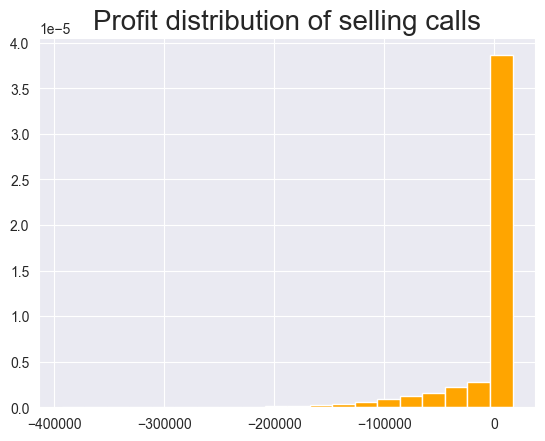

The expected profit of selling 100 calls at black scholes price $-0.48
-----------
Max profit of selling 100 calls $165.2
---------
Max loss of selling 100 calls $-3933.94


In [6]:
#option price
option_price = MC_black_scholes['MC_call']


# Store call option values
option_values = np.maximum((A[-1] - K), 0)

# Calculate the payoffs for selling calls at black scholes price
returns = 100*(-option_values + option_price)

# Plot the profit distribution of buying puts
plt.hist(100*returns, density=True, bins=20, color='orange')
plt.title('Profit distribution of selling calls', size=20)
plt.show()


print(f'The expected profit of selling 100 calls at black scholes price ${round(np.mean(returns),2)}')
print('-----------')
print(f'Max profit of selling 100 calls ${round(np.max(returns),2)}')
print('---------')
print(f'Max loss of selling 100 calls ${round(np.min(returns),2)}')

## Covered call

A common strategy when selling call options, that creates a more balanced profit to loss ratio, is to do a covered call. This is when a trader purchases the same number of the underlying stock as number of contracts sold.

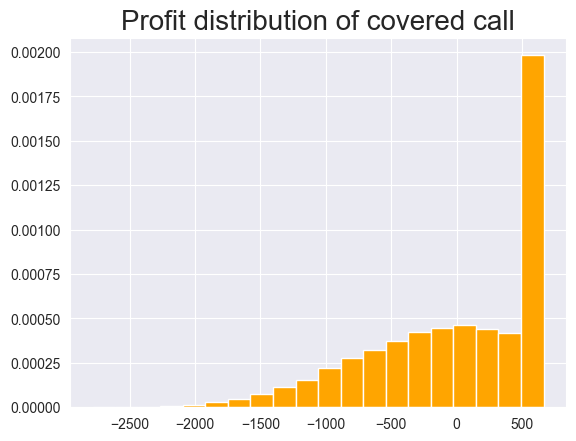

The expected profit of covered call $-1
-----------
Max profit of 100 covered calls 665.2
---------
Max loss of 100 covered calls -2783.54


In [7]:
# Find value of portfolios with simulated stock movements
end_position_values_covered_call = 100 * A[-1] + 100*(-option_values + option_price)

# Plot the profit distribution of buying puts
plt.hist(end_position_values_covered_call - 100*S, density=True, bins=20, color='orange')
plt.title('Profit distribution of covered call', size=20)
plt.show()


print(f'The expected profit of covered call ${round(np.mean(end_position_values_covered_call - 100*S))}')
print('-----------')
print(f'Max profit of 100 covered calls {round(np.max(end_position_values_covered_call - 100*S),2)}')
print('---------')
print(f'Max loss of 100 covered calls {round(np.min(end_position_values_covered_call- 100*S),2)}')

## Static Delta Hedging

Let's now examine the profit distribution of a protective call strategy that only purchases enough of the underlying stock to create a **delta neutral** position at the onset of the trade. 

The rate of change of the value of a stock, with respect to the change of the price of the stock, is $1$ by definition. 

The rate of change of the value of a call, with respect to the change of the price of the stock, is the "delta" of the call option contract.

To delta hedge a portfolio of selling 100 call contracts, we find the rate of change of the call contract with respect to price fluctuations of the underlying. (This can be done with black scholes equations or simulation, we use simulation.)  

In [8]:
delta_sold_calls = 100*MC_delta(S, T, sigma, N, K)['delta_call']
num_stocks_buy = np.ceil(delta_sold_calls)

print(f'Delta of sold calls: {delta_sold_calls}')
print('----------')
print(f'The trader will purchase {num_stocks_buy} shares of the underlying stock')

Delta of sold calls: 30.466431113346353
----------
The trader will purchase 31.0 shares of the underlying stock


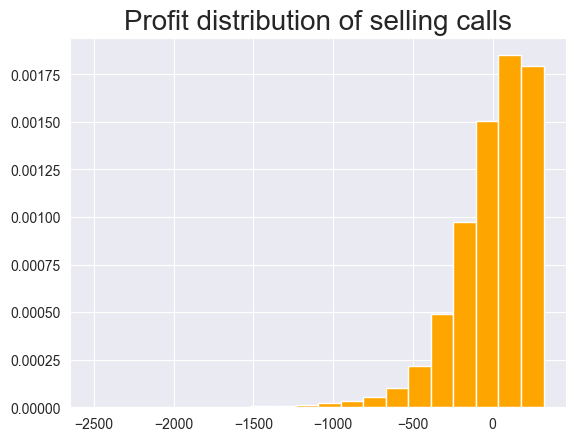

The expected profit of selling 100 calls at black scholes price with delta neutral position $-1
-----------
Max profit of selling 100 calls with static hedge 320.19
---------
Max loss of selling 100 calls with static hedge -2508.21


In [10]:
# Find value of portfolios with simulated stock movements
end_position_values = num_stocks_buy * A[-1] + 100*(-option_values + option_price)

# Plot the profit distribution of buying puts
plt.hist(end_position_values- num_stocks_buy*S, density=True, bins=20, color='orange')
plt.title('Profit distribution of selling calls', size=20)
plt.show()


print(f'The expected profit of selling 100 calls at black scholes price with delta neutral position ${round(np.mean(end_position_values - num_stocks_buy*S))}')
print('-----------')
print(f'Max profit of selling 100 calls with static hedge {round(np.max(end_position_values- num_stocks_buy*S),2)}')
print('---------')
print(f'Max loss of selling 100 calls with static hedge {round(np.min(end_position_values- num_stocks_buy*S),2)}')

## Dynamic Delta Hedging

Dynamic delta hedging is the process of routinely rebalancing a portfolio to be delta neutral.

For example suppose a trader creates a delta neutral portfolio to hedge against infinite loss potential of selling call options. 
- If the price of the underlying stock moves up the next day/week/month, the portfolio will have an decrease in delta, and so the trader will purchase more of the underlying stock to rebalance the portfolio's delta. 

- If the price of the underlying stock moves down the next day/week/month, the portfolio will have an increase in delta, and so the trader will sell part of the underlying stock being held to rebalance the portfolio's delta.

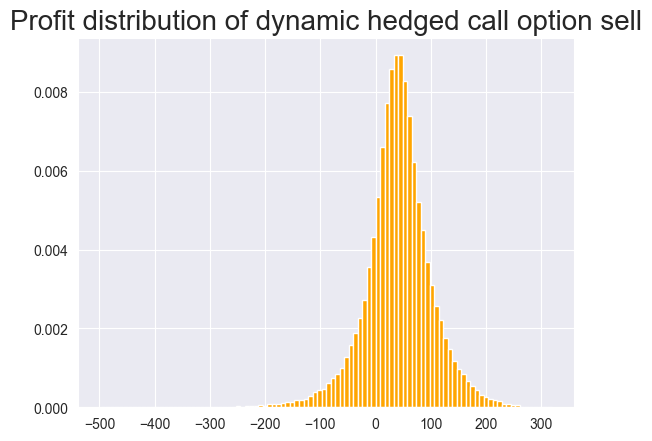

The expected profit of selling 100 calls at black scholes price with dynamic delta hedging: $41
-----------
Max profit of selling 100 calls with static hedge 318.61
---------
Max loss of selling 100 calls with static hedge -497.78


In [35]:
# Calculate Time to Expiration (TTE) for each step
TTE = [(DTE - i) / 252 for i in range(DTE + 1)]

portfolio_profits = []

for i in range(N):
    # Extract the stock path for the i-th simulation
    stock_path = [A[j][i] for j in range(len(A))]
    
    # Calculate deltas for each step along the stock path
    deltas_stock_path = [delta('c', stock_path[j], K, TTE[j], 0, sigma) for j in range(len(stock_path) - 1)] + [0]
    
    # Number of stocks in the portfolio at each step
    stocks_in_portfolio = [np.ceil(100 * deltas_stock_path[j]) for j in range(len(deltas_stock_path))]
    
    # Capital spent or received from buying and selling stock through dynamic hedging
    capital = [-stock_path[0] * stocks_in_portfolio[0]] + [
        -stock_path[j] * (stocks_in_portfolio[j] - stocks_in_portfolio[j - 1]) 
        for j in range(1, len(stocks_in_portfolio))
    ]
    
    # Profits from buying and selling stock
    stock_profit = np.sum(capital)
    
    # Calculate option trade profit
    option_trade_profit = 100 * (-max(stock_path[-1] - K, 0) + bs_multiplier*option_price)
    
    # Append the total profit for this simulation
    portfolio_profits.append(option_trade_profit + stock_profit)



# Plot the profit distribution of buying puts
plt.hist(portfolio_profits, density=True, bins=100, color='orange')
plt.title('Profit distribution of dynamic hedged call option sell', size=20)
plt.show()


print(f'The expected profit of selling 100 calls at black scholes price with dynamic delta hedging: ${round(np.mean(portfolio_profits))}')
print('-----------')
print(f'Max profit of selling 100 calls with static hedge {round(np.max(portfolio_profits),2)}')
print('---------')
print(f'Max loss of selling 100 calls with static hedge {round(np.min(portfolio_profits),2)}')

## Takeaway

Accurately modeling a stock's volatility allows for dynamic hedging of a portfolio through the simultaneous buying and selling of option contracts and stocks. This approach creates an expected profit distribution that minimizes the risk of extreme loss (and extreme gain), leading to long-term consistent profits.

## Experiment

How do historical option contract prices compare to that of black scholes option pricing?

In [12]:
import datetime as dt
import yfinance as yf
from polygon import RESTClient
import pandas as pd
import math

%run api.py
client = RESTClient(key)

In [13]:
ticker = 'T'

start_date = dt.datetime.now()-dt.timedelta(days=600)
end_date = dt.datetime.now()-dt.timedelta(days=300)

stock_data = yf.download(ticker, start = start_date, end = end_date)


historical_stock_price = stock_data['Close'][-1]

historical_date = stock_data.index[-1]

formatted_date = historical_date.strftime('%Y-%m-%d')

[*********************100%***********************]  1 of 1 completed


In [14]:
historical_stock_price, formatted_date

(14.449999809265137, '2023-10-06')

In [15]:
stock_data['log returns'] = np.log(stock_data['Adj Close']/stock_data['Adj Close'].shift(1))

# Calculate the 30-day rolling standard deviation of log returns and drop NaN values
moving_average_30d = stock_data['log returns'].rolling(window=21).std().dropna()

# Calculate the annualized volatility using the mean of the rolling standard deviations
yearly_volatility = moving_average_30d.mean() * np.sqrt(252)

# Print the result
print(f'The 30-day moving average volatility of {ticker} is {round(np.mean(yearly_volatility * 100), 2)}%')


The 30-day moving average volatility of T is 26.0%


In [16]:
contractNames = []
for c in client.list_options_contracts(underlying_ticker = ticker, limit = 1000, as_of=formatted_date):
    contractNames.append(c)

In [17]:
len(contractNames)

678

In [18]:
puts = []
calls = []
for i in range(len(contractNames)):
    data = contractNames[i]
    if data.contract_type== 'put':
        puts.append(data)
    else:
        calls.append(data)

In [20]:
def time_to_expiration(start: str, end: str) -> int:
    """
    Calculate the number of days between two dates.

    Parameters:
    start (str): The start date in 'YYYY-MM-DD' format.
    end (str): The end date in 'YYYY-MM-DD' format.

    Returns:
    int: The number of days between the two dates.
    """
    date_format = '%Y-%m-%d'
    try:
        # Convert the date strings to datetime objects
        start_date = dt.datetime.strptime(start, date_format)
        end_date = dt.datetime.strptime(end, date_format)
        
        # Calculate the difference in days
        delta = end_date - start_date
        return delta.days
    except ValueError as e:
        raise ValueError(f"Invalid date format: {e}")

In [21]:
# Define the strike range and expiration date range
calls_in_range = []
strike_range = 5
min_exp_days = 1
max_exp_days = 90
lower_exp_date = start_date + dt.timedelta(days=min_exp_days)
higher_exp_date = start_date + dt.timedelta(days=max_exp_days)

lower_exp_date_formatted = lower_exp_date.strftime('%Y-%m-%d')
higher_exp_date_formatted = higher_exp_date.strftime('%Y-%m-%d')

# Convert string dates to datetime objects
start_date_dt = dt.datetime.strptime(lower_exp_date_formatted, '%Y-%m-%d')
end_date_dt = dt.datetime.strptime(higher_exp_date_formatted, '%Y-%m-%d')

for i in range(len(calls)):
    data = calls[i]
    expiration_date_str = data.expiration_date
    
    # Convert expiration_date to datetime object
    expiration_date_dt = dt.datetime.strptime(expiration_date_str, '%Y-%m-%d')
    
    # Check if strike price and expiration date are within the desired range
    if (0 <= -math.ceil(historical_stock_price) + data.strike_price <= strike_range) and (min_exp_days<=time_to_expiration(formatted_date, expiration_date_str)<=max_exp_days):
        calls_in_range.append(data)

In [23]:
len(calls_in_range)

72

In [24]:
call_market_price = {}

for i in range(len(calls_in_range)):
    ticker_name = calls_in_range[i].ticker
    try:
        # Make the API call
        OptionData = client.get_aggs(
            ticker=ticker_name,
            multiplier=1,
            timespan='day',
            from_=formatted_date,
            to=formatted_date
        )
        
        # Check if OptionData is not empty
        if OptionData:
            # Access the close price
            call_market_price[ticker_name] = OptionData[0].close
        
    except Exception as e:
        # Handle exceptions, e.g., API call errors
        print(f"Error retrieving data for {ticker_name}: {e}")
        call_market_price[ticker_name] = None  

In [25]:
options_data = [
    {
        'ticker': data.ticker,
        'contract_type': data.contract_type,
        'expiration_date': data.expiration_date,
        'strike_price': data.strike_price,
        'underlying_ticker': data.underlying_ticker
    }
    for data in calls_in_range
]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(options_data)

# Set the ticker as the index
df.set_index('ticker', inplace=True)

In [26]:
df['market_price'] = df.index.map(call_market_price)
df_cleaned = df.dropna(subset=['market_price'])

In [30]:
df_cleaned

,contract_type,expiration_date,strike_price,underlying_ticker,market_price,days_to_expiration,black_scholes_implied_vol
ticker,,,,,,,
O:T231013C00015000,call,2023-10-13,15.0,T,0.04,7.0,0.257677
O:T231013C00015500,call,2023-10-13,15.5,T,0.01,7.0,0.291100
O:T231013C00016000,call,2023-10-13,16.0,T,0.01,7.0,0.394184
O:T231013C00016500,call,2023-10-13,16.5,T,0.01,7.0,0.489825
O:T231020C00015000,call,2023-10-20,15.0,T,0.20,14.0,0.364139
O:T231020C00015500,call,2023-10-20,15.5,T,0.08,14.0,0.347522
O:T231020C00016000,call,2023-10-20,16.0,T,0.04,14.0,0.370363
O:T231020C00016500,call,2023-10-20,16.5,T,0.02,14.0,0.391151
O:T231020C00017000,call,2023-10-20,17.0,T,0.01,14.0,0.409921


In [28]:
df_cleaned['days_to_expiration'] = np.nan

for index in df_cleaned.index:
    expiration_date = df_cleaned['expiration_date'][index]
    days_to_expiration = time_to_expiration(formatted_date, expiration_date)
    df_cleaned.loc[index, 'days_to_expiration'] = days_to_expiration

/var/folders/dq/jny5hj1d21j6j65pcj3d9qx80000gq/T/ipykernel_4160/450382651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['days_to_expiration'] = np.nan


In [29]:
df_cleaned['black_scholes_implied_vol'] = np.nan

for index in df_cleaned.index:
    implied_vol = iv.implied_volatility(df_cleaned.loc[index, 'market_price'], historical_stock_price, df_cleaned.loc[index, 'strike_price'], df_cleaned.loc[index, 'days_to_expiration'] / 365,0,'c')
    df_cleaned.loc[index, 'black_scholes_implied_vol'] = implied_vol

/var/folders/dq/jny5hj1d21j6j65pcj3d9qx80000gq/T/ipykernel_4160/2813770256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['black_scholes_implied_vol'] = np.nan


In [31]:
avg_implied_vol = np.mean(df_cleaned['black_scholes_implied_vol'])

In [32]:
avg_implied_vol

0.3473586204317003

In [33]:
bs_multiplier = (avg_implied_vol-yearly_volatility)/avg_implied_vol+1

In [34]:
bs_multiplier

1.251522917677066